# Analysing the results of the experiments

In [56]:
# Imports
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu


In [57]:
# Load the results dataset
directory = 'results'

df_list = []
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        df_list.append(df)

results = pd.concat(df_list, ignore_index=True)
# print(results.shape)
results.head()

,ontology,iteration,command_output,number_of_hypothesis_returned,algorithm_total_time,ontology_parsing_time,observation_time,gateway_opening_time,gateway_closing_time
0,AnimalsOntologyForStudy.owl,1,Use just_based\nLoading ontology..\ndone loadi...,1,0.290458,0.783501,2.633907,0.022082,0.002990
1,AnimalsOntologyForStudy.owl,2,Use just_based\nLoading ontology..\ndone loadi...,2,0.030555,0.024997,2.499305,0.009356,0.001999
2,AnimalsOntologyForStudy.owl,3,Use just_based\nLoading ontology..\ndone loadi...,2,0.045002,0.023994,2.411895,0.007015,0.002193
3,AnimalsOntologyForStudy.owl,4,Use just_based\nLoading ontology..\ndone loadi...,2,0.025594,0.034562,2.371291,0.007019,0.002678
4,AnimalsOntologyForStudy.owl,5,Use just_based\nLoading ontology..\ndone loadi...,1,0.096445,0.052752,2.809326,0.007998,0.001998


In [58]:
# Get ontology size from the command_output
def extract_ontology_size(output):
    match = re.search(r'Ontology size: (\d+)', output)
    if match:
        return int(match.group(1))
    else:
        return None
    
results['ontology_size'] = results['command_output'].apply(extract_ontology_size)
results.head()

,ontology,iteration,command_output,number_of_hypothesis_returned,algorithm_total_time,ontology_parsing_time,observation_time,gateway_opening_time,gateway_closing_time,ontology_size
0,AnimalsOntologyForStudy.owl,1,Use just_based\nLoading ontology..\ndone loadi...,1,0.290458,0.783501,2.633907,0.022082,0.002990,3
1,AnimalsOntologyForStudy.owl,2,Use just_based\nLoading ontology..\ndone loadi...,2,0.030555,0.024997,2.499305,0.009356,0.001999,1
2,AnimalsOntologyForStudy.owl,3,Use just_based\nLoading ontology..\ndone loadi...,2,0.045002,0.023994,2.411895,0.007015,0.002193,1
3,AnimalsOntologyForStudy.owl,4,Use just_based\nLoading ontology..\ndone loadi...,2,0.025594,0.034562,2.371291,0.007019,0.002678,1
4,AnimalsOntologyForStudy.owl,5,Use just_based\nLoading ontology..\ndone loadi...,1,0.096445,0.052752,2.809326,0.007998,0.001998,5


In [59]:
# Total time taken for algorithm (including algorithm time, parsing ontology, opening and closing gateway)

results['total_time'] = results['algorithm_total_time']+results['gateway_opening_time']+results['gateway_closing_time']
results.head()

,ontology,iteration,command_output,number_of_hypothesis_returned,algorithm_total_time,ontology_parsing_time,observation_time,gateway_opening_time,gateway_closing_time,ontology_size,total_time
0,AnimalsOntologyForStudy.owl,1,Use just_based\nLoading ontology..\ndone loadi...,1,0.290458,0.783501,2.633907,0.022082,0.002990,3,0.315531
1,AnimalsOntologyForStudy.owl,2,Use just_based\nLoading ontology..\ndone loadi...,2,0.030555,0.024997,2.499305,0.009356,0.001999,1,0.041910
2,AnimalsOntologyForStudy.owl,3,Use just_based\nLoading ontology..\ndone loadi...,2,0.045002,0.023994,2.411895,0.007015,0.002193,1,0.054210
3,AnimalsOntologyForStudy.owl,4,Use just_based\nLoading ontology..\ndone loadi...,2,0.025594,0.034562,2.371291,0.007019,0.002678,1,0.035290
4,AnimalsOntologyForStudy.owl,5,Use just_based\nLoading ontology..\ndone loadi...,1,0.096445,0.052752,2.809326,0.007998,0.001998,5,0.106442


In [60]:
# Compute success rate
total_rows = len(results)
successful_rows = results[results['number_of_hypothesis_returned'] >= 1].shape[0]
success_rate = successful_rows / total_rows *100
print(success_rate)

100.0


In [61]:
# Average, median, max, min number of hypothesis returned
number_of_hypothesis = {
    'mean': results['number_of_hypothesis_returned'].mean(),
    'median': results['number_of_hypothesis_returned'].median(),
    'max': results['number_of_hypothesis_returned'].max(),
    'min': results['number_of_hypothesis_returned'].min()
}
# Average, mean, median, max, min number of ontology size
ontology_size = {
    'mean': results['ontology_size'].mean(),
    'median': results['ontology_size'].median(),
    'max': results['ontology_size'].max(),
    'min': results['ontology_size'].min()
}
# Average, mean, median, max, min number of algorithm time
algorithm_time = {
    'mean': results['total_time'].mean(),
    'median': results['total_time'].median(),
    'max': results['total_time'].max(),
    'min': results['total_time'].min()
}

observation_creation_time = {
    'mean': results['observation_time'].mean(),
    'median': results['observation_time'].median(),
    'max': results['observation_time'].max(),
    'min': results['observation_time'].min()
}

print("Number of hypothesis returned",number_of_hypothesis)
print("Ontology Size", ontology_size)
print("Total time taken by algorithm",algorithm_time)
print("Total time taken to create observations and ontologies",observation_creation_time)

Number of hypothesis returned {'mean': 1.3685106382978725, 'median': 1.0, 'max': 4, 'min': 1}
Ontology Size {'mean': 2.8793617021276594, 'median': 2.0, 'max': 30, 'min': 1}
Total time taken by algorithm {'mean': 0.10458594443950232, 'median': 0.0882194042205809, 'max': 1.350475549697876, 'min': 0.031216859817504702}
Total time taken to create observations and ontologies {'mean': 6.781808907326232, 'median': 6.501530766487122, 'max': 36.90528154373169, 'min': 2.258212089538574}


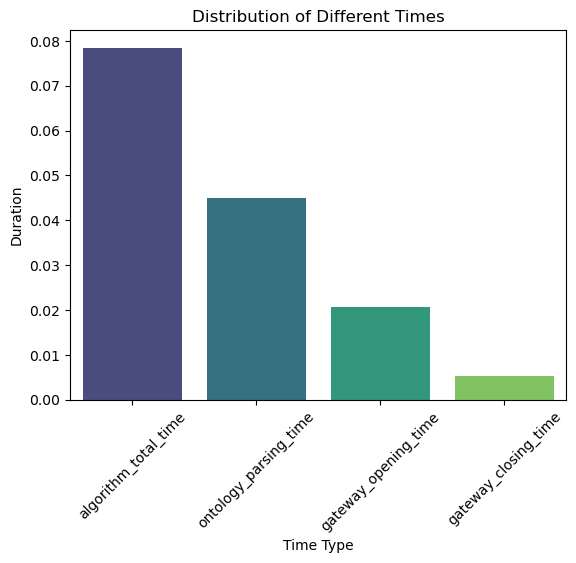

In [62]:
time_columns = ['algorithm_total_time', 'ontology_parsing_time', 'gateway_opening_time', 'gateway_closing_time']
mean_times = df[time_columns].mean()
df = mean_times.reset_index()
df.columns = ['Time Type', 'Duration']
sns.barplot(x='Time Type', y='Duration', data=df, palette='viridis')
plt.title('Distribution of Different Times')
plt.xlabel('Time Type')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.show()

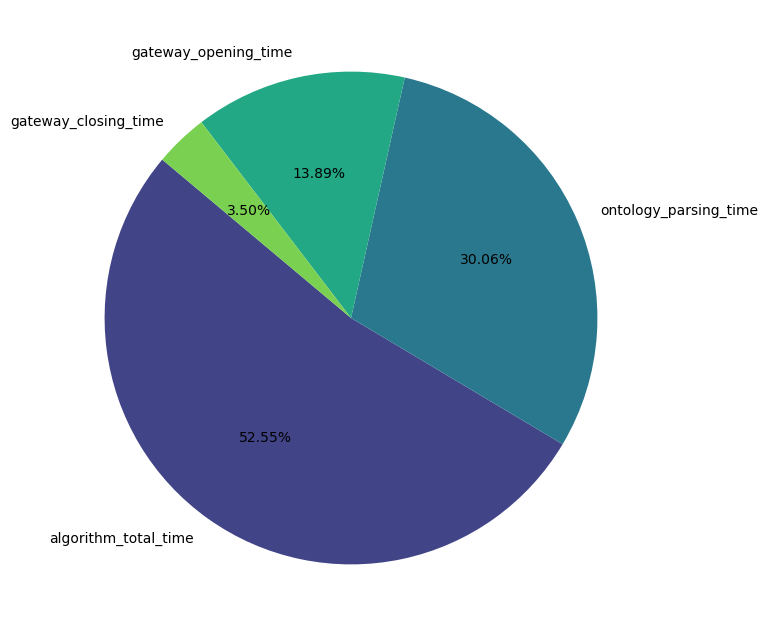

In [63]:
plt.figure(figsize=(8, 8))
plt.pie(mean_times, labels=mean_times.index, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('viridis', len(mean_times)))
plt.show()

c:\Users\Hari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


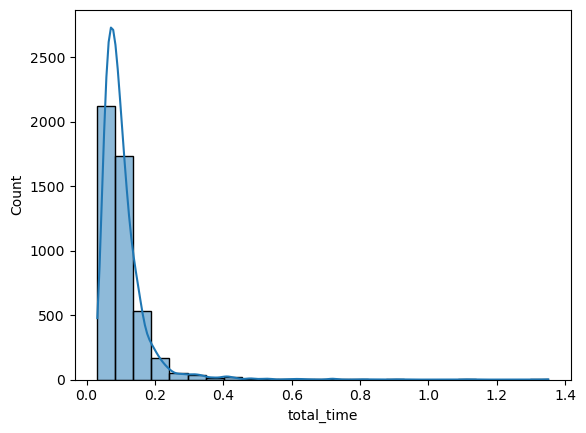

In [64]:
# Plots of time_taken
sns.histplot(results['total_time'], bins=25, kde=True);

c:\Users\Hari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


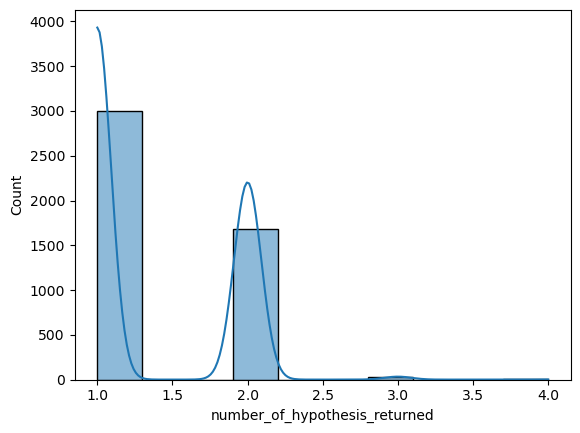

In [65]:
sns.histplot(results['number_of_hypothesis_returned'], bins=10, kde=True);

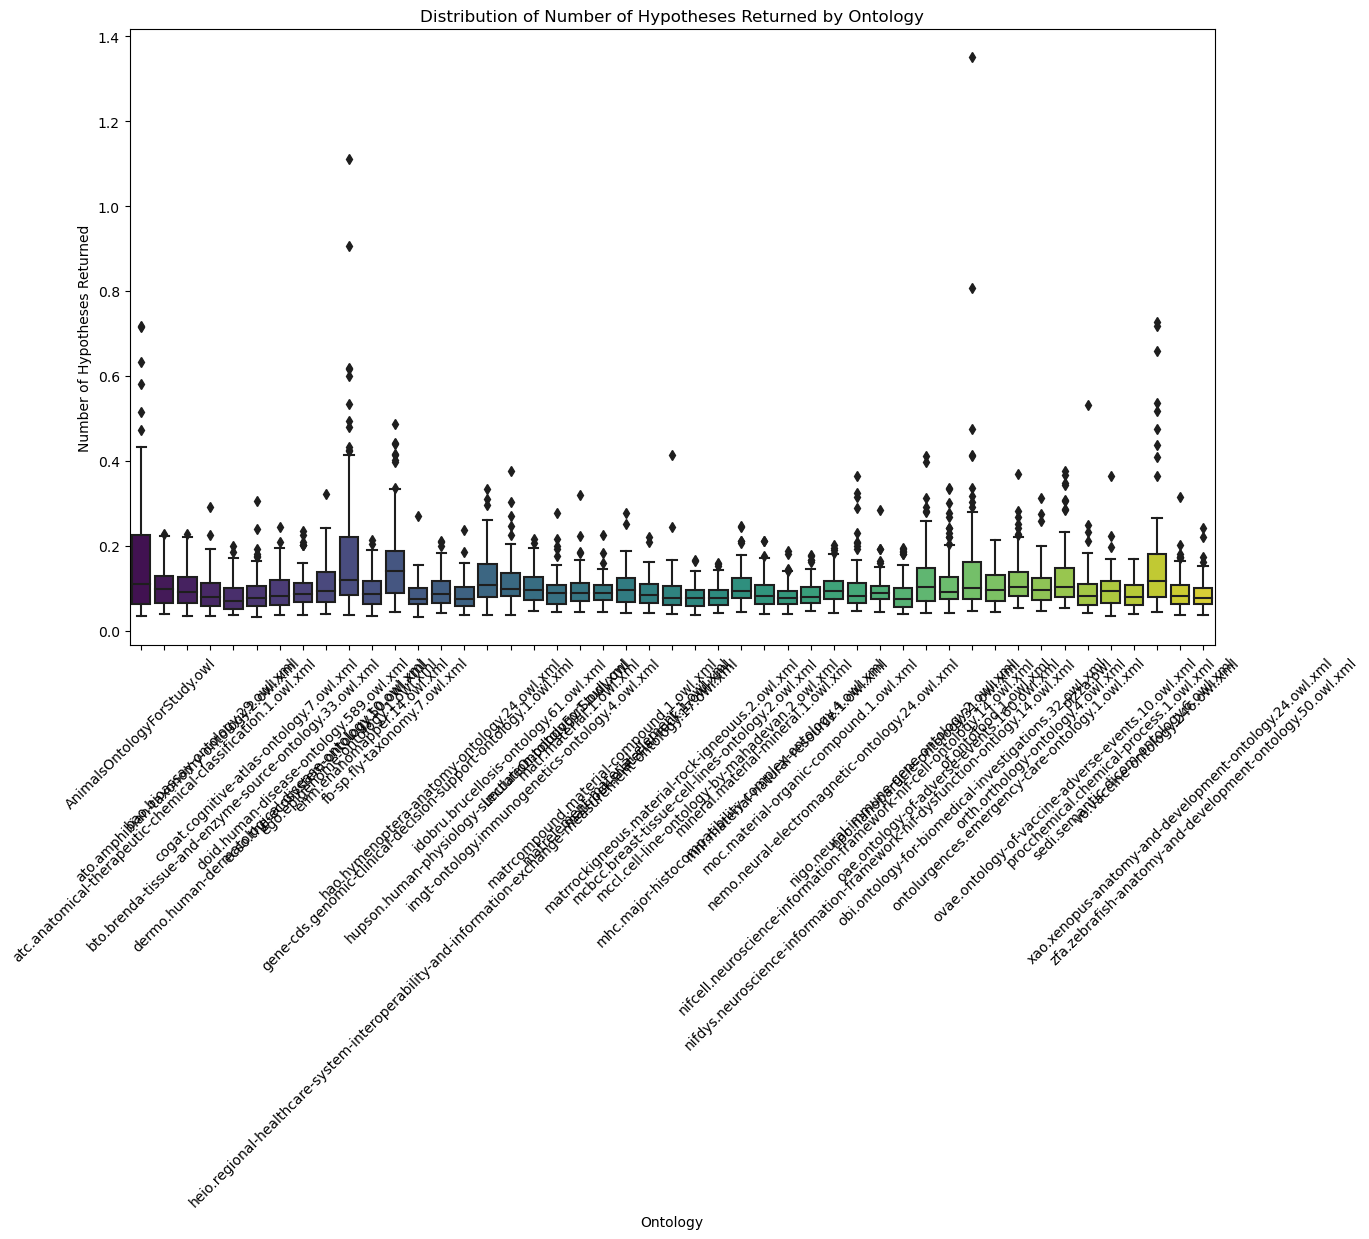

In [66]:
# Plots for number of hypothesis returned
plt.figure(figsize=(14, 8))
sns.boxplot(x='ontology', y='total_time', data=results,order=results['ontology'].unique(), palette='viridis')
plt.title('Distribution of Number of Hypotheses Returned by Ontology')
plt.xlabel('Ontology')
plt.ylabel('Number of Hypotheses Returned')
plt.xticks(rotation=45)
plt.show()

C:\Users\Hari\AppData\Local\Temp\ipykernel_33696\1348466338.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='ontology_size', y='number_of_hypothesis_returned', data=results, palette='viridis')


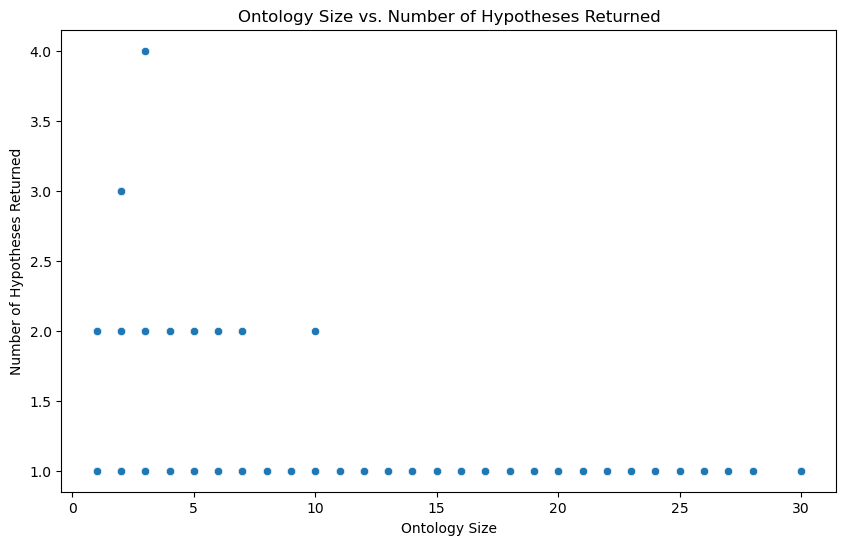

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ontology_size', y='number_of_hypothesis_returned', data=results, palette='viridis')
plt.title('Ontology Size vs. Number of Hypotheses Returned')
plt.xlabel('Ontology Size')
plt.ylabel('Number of Hypotheses Returned')
plt.show()

In [68]:
# Sample data
successes = 4700  # Number of successes
total = 4700  # Total number of trials
expected_proportion = 0.5  # Expected proportion under the null hypothesis

# Perform one-proportion z-test
z_statistic, p_value = proportions_ztest(successes, total, expected_proportion)

# Print the results
print("Z-statistic:", z_statistic)
print("P-value:", p_value)

Z-statistic: inf
P-value: 0.0


c:\Users\Hari\anaconda3\Lib\site-packages\statsmodels\stats\weightstats.py:792: RuntimeWarning: divide by zero encountered in scalar divide
  zstat = value / std


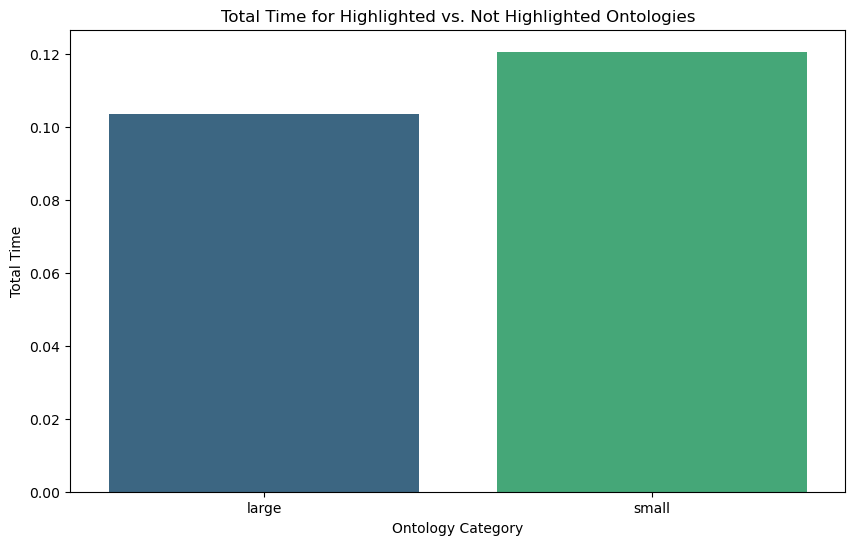

In [69]:
smaller_ontologies = ['AnimalsOntologyForStudy.owl', 'LectureOntologyForStudy.owl', 'pizza.owl']
results['ontology_category'] = results['ontology'].apply(lambda x: 'small' if x in smaller_ontologies else 'large')
aggregated_data = results.groupby('ontology_category')['total_time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='ontology_category', y='total_time', data=aggregated_data, palette='viridis')
plt.title('Total Time for Highlighted vs. Not Highlighted Ontologies')
plt.xlabel('Ontology Category')
plt.ylabel('Total Time')
plt.show()

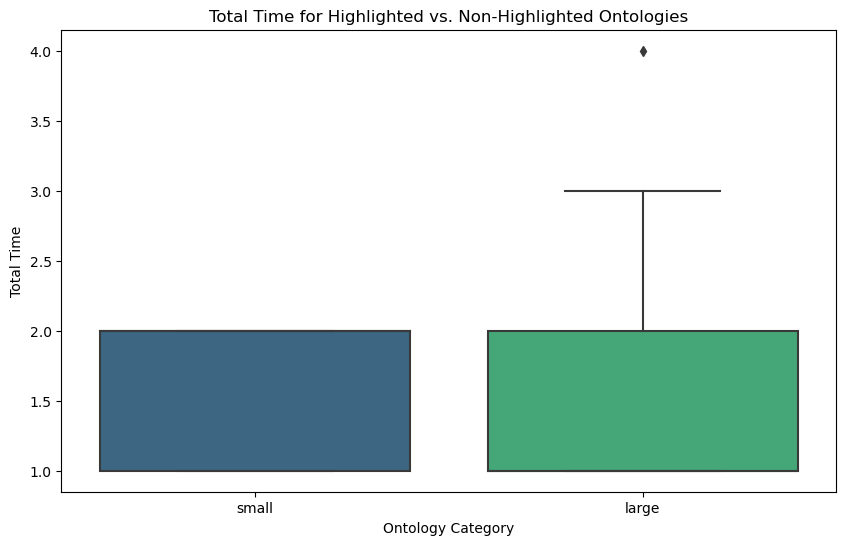

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ontology_category', y='number_of_hypothesis_returned', data=results, palette='viridis')
plt.title('Total Time for Highlighted vs. Non-Highlighted Ontologies')
plt.xlabel('Ontology Category')
plt.ylabel('Total Time')
plt.show()

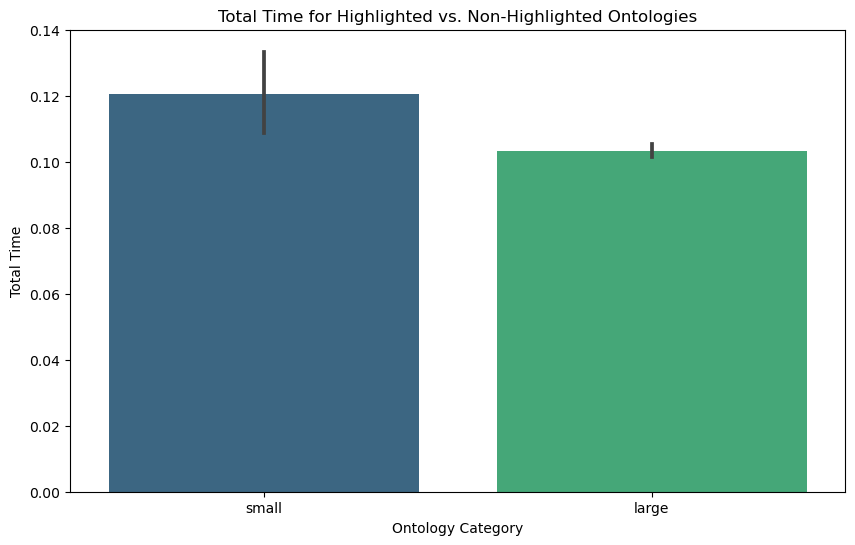

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ontology_category', y='total_time', data=results, palette='viridis')
plt.title('Total Time for Highlighted vs. Non-Highlighted Ontologies')
plt.xlabel('Ontology Category')
plt.ylabel('Total Time')
plt.show()

c:\Users\Hari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


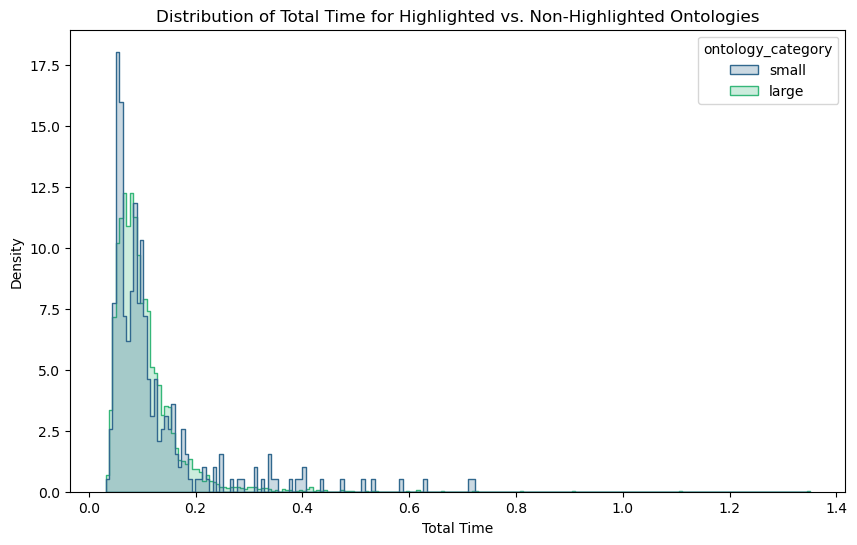

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(results, x='total_time', hue='ontology_category', element='step', stat='density', common_norm=False, palette='viridis')
plt.title('Distribution of Total Time for Highlighted vs. Non-Highlighted Ontologies')
plt.xlabel('Total Time')
plt.ylabel('Density')
plt.show()

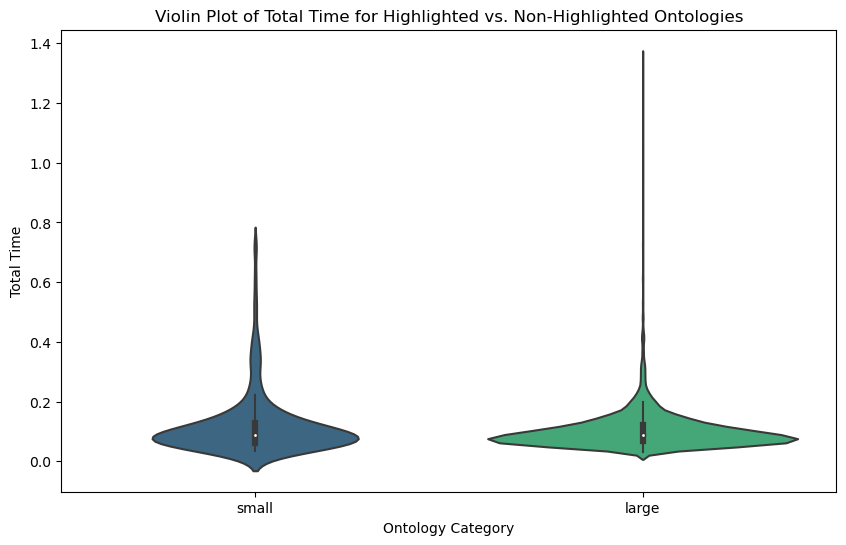

In [73]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ontology_category', y='total_time', data=results, palette='viridis')
plt.title('Violin Plot of Total Time for Highlighted vs. Non-Highlighted Ontologies')
plt.xlabel('Ontology Category')
plt.ylabel('Total Time')
plt.show()


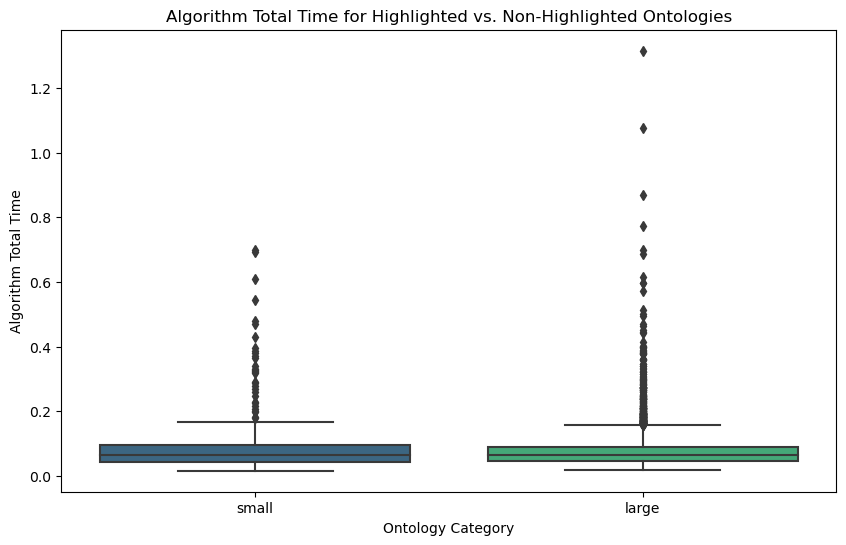

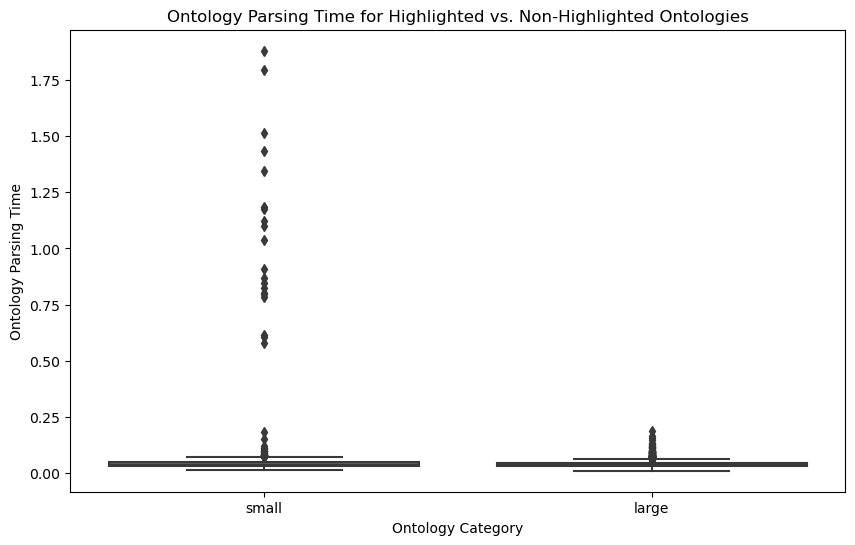

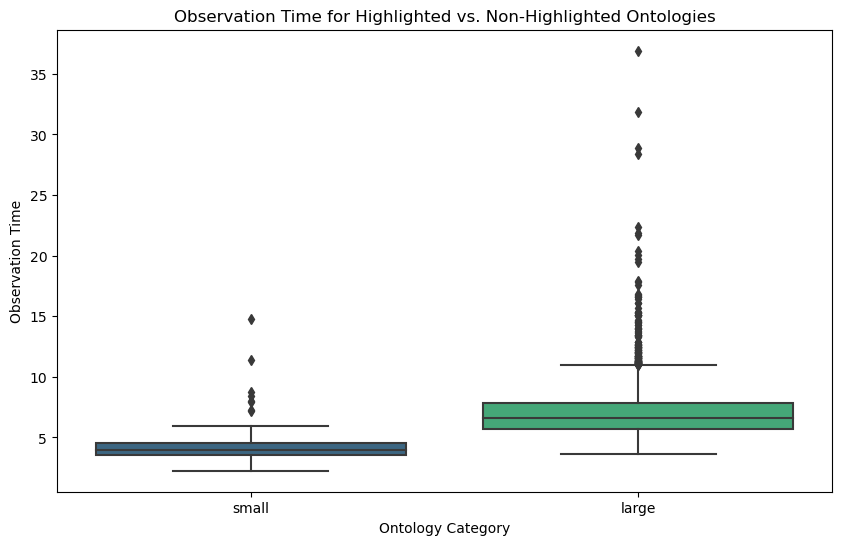

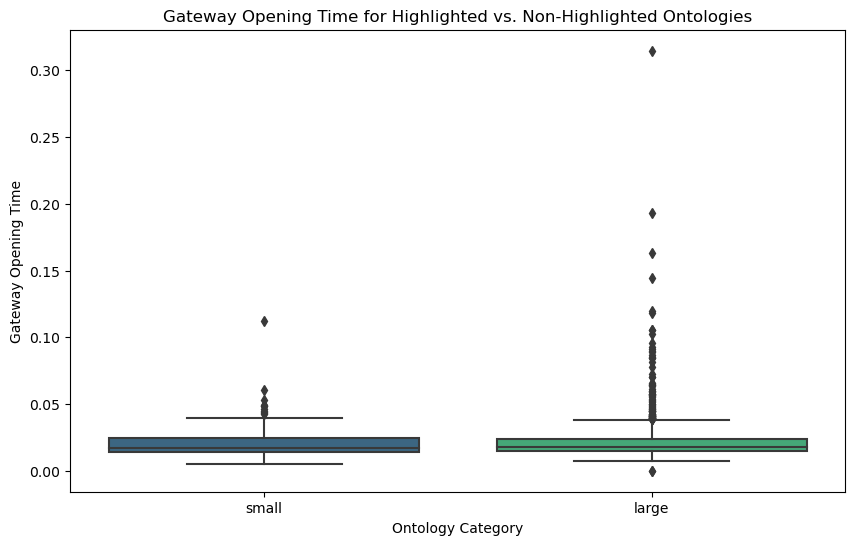

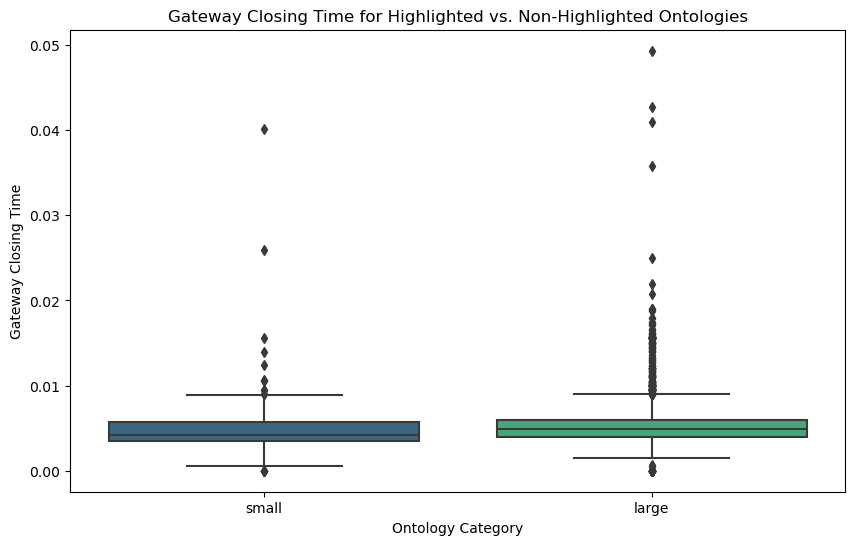

In [74]:
metrics = ['algorithm_total_time', 'ontology_parsing_time', 'observation_time', 'gateway_opening_time', 'gateway_closing_time']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='ontology_category', y=metric, data=results, palette='viridis')
    plt.title(f'{metric.replace("_", " ").title()} for Highlighted vs. Non-Highlighted Ontologies')
    plt.xlabel('Ontology Category')
    plt.ylabel(metric.replace("_", " ").title())
    plt.show()


<Figure size 1000x600 with 0 Axes>

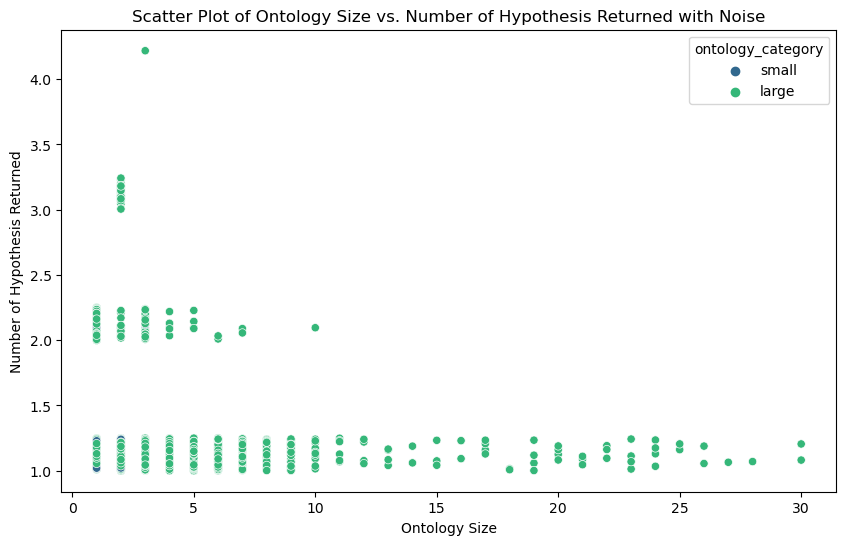

In [81]:
plt.figure(figsize=(10, 6))
noise = np.random.uniform(0, 0.25, len(results))
results['num_hyp'] = results['number_of_hypothesis_returned'] + noise

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ontology_size', y='num_hyp', hue='ontology_category', data=results, palette='viridis')
plt.title('Scatter Plot of Ontology Size vs. Number of Hypothesis Returned with Noise')
plt.xlabel('Ontology Size')
plt.ylabel('Number of Hypothesis Returned')
plt.show()


In [76]:
# T-test assumes normally distributed
small = results[results['ontology_category'] == 'small']['total_time']
large = results[results['ontology_category'] == 'large']['total_time']

t_statistic, p_value = ttest_ind(small, large)

print("Two-Sample T-Test")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Two-Sample T-Test
T-statistic: 4.202644811982076
P-value: 2.68713174550326e-05


In [77]:
# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(small, large)

print("Mann-Whitney U Test")
print("U-statistic:", u_statistic)
print("P-value:", p_value)

Mann-Whitney U Test
U-statistic: 664236.0
P-value: 0.8522430197588591


In [78]:
from scipy.stats import ks_2samp

# Perform Kolmogorov-Smirnov test
d_statistic, p_value = ks_2samp(small, large)

print("Kolmogorov-Smirnov Test")
print("D-statistic:", d_statistic)
print("P-value:", p_value)

Kolmogorov-Smirnov Test
D-statistic: 0.07954545454545454
P-value: 0.054156846428765365
